In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing DataSet

In [2]:
df_abalone = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")

In [3]:
df_abalone.shape

(4177, 9)

In the dataset there are 9 columns and 4177 rows.

In [4]:
df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Observations :

* You have to predict the rings of each abalone which will lead us to the age of that abalone.probelm type is a regression.
* There is not any null values.
* sex column is object type.

Backup of data

In [7]:
Backup_data = df_abalone.copy()

### Exploratry Data Analysis (EDA)

In [8]:
# using seaborn's style function
sns.set(style = 'darkgrid') 

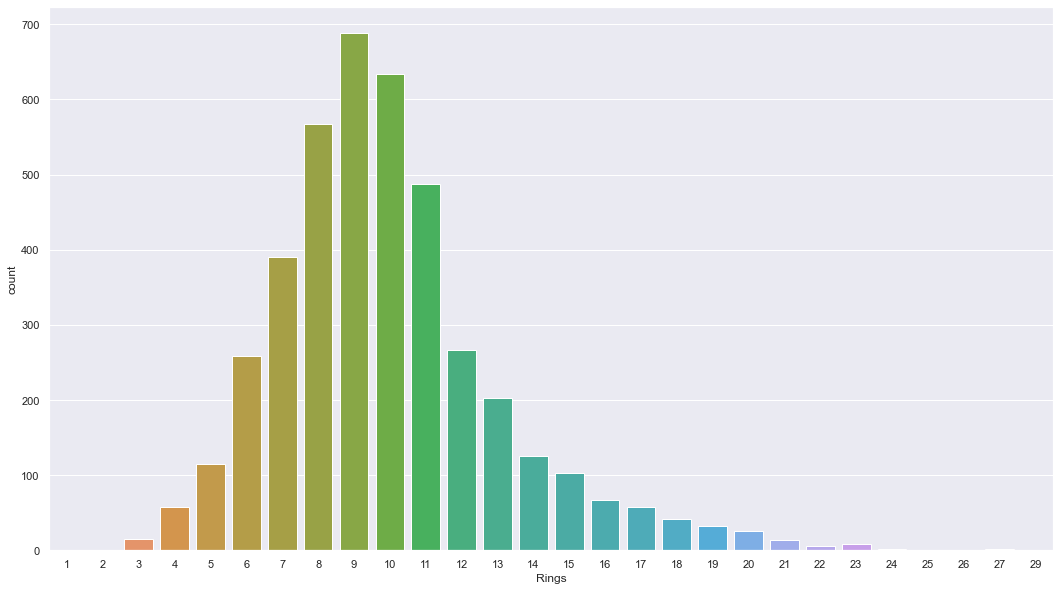

In [9]:
#checking the distribution of our label data
plt.figure(figsize=(18,10))
sns.countplot(x='Rings',data=df_abalone)

<Figure size 1296x1080 with 0 Axes>

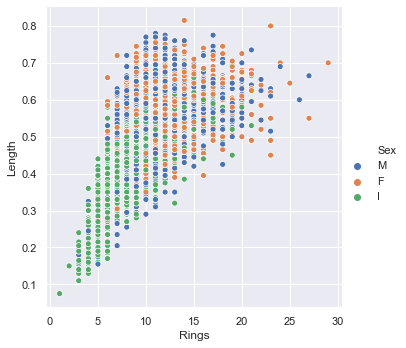

In [10]:
#Now we will plot the relational plot using the sns.relplot and visualize the relation between Rings and Length
plt.figure(figsize=(18,15))
sns.relplot(x = 'Rings', y = 'Length', data = df_abalone,hue = 'Sex')

<Figure size 1296x1080 with 0 Axes>

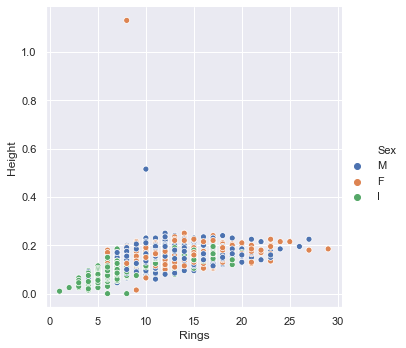

In [11]:
#Now we will plot the relational plot using the sns.relplot and visualize the relation between Rings and Height
plt.figure(figsize=(18,15))
sns.relplot(x = 'Rings', y = 'Height', data = df_abalone,hue = 'Sex')

<Figure size 720x576 with 0 Axes>

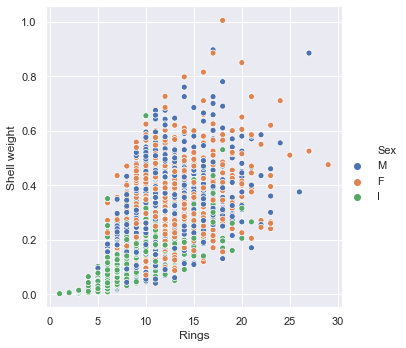

In [12]:
#Now we will plot the relational plot using the sns.relplot and visualize the relation between Rings and Shell weight
plt.figure(figsize=(10,8))
sns.relplot(x = 'Rings', y = 'Shell weight', data = df_abalone,hue = 'Sex')

<Figure size 864x864 with 0 Axes>

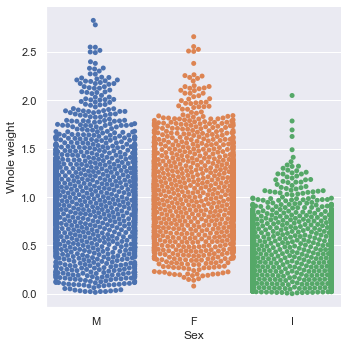

In [13]:
#visualizing the sex and Whole weight
plt.figure(figsize=(12,12))
sns.catplot(x = 'Sex', y = 'Whole weight', data = df_abalone,kind = 'swarm')

In [14]:
#checking the numerical values for the data distribution
df_numeric = df_abalone.select_dtypes(include=['int64','float64'])

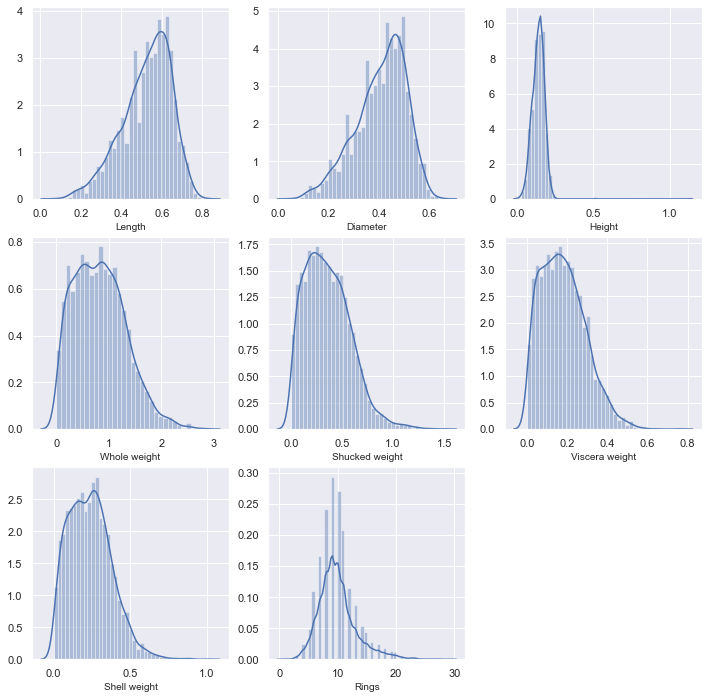

In [15]:
plt.figure(figsize=(12,12))
plotnumber=1
for i in df_numeric:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df_abalone[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

## Outlianrs  Removel...! 

Using quantile function to remove skwness and outliars.

In [16]:
#Checking the max_threshhold for Height
max_threshhold = df_abalone['Height'].quantile(0.95)
print("max_threshhold for Height=>",max_threshhold)

#Checking the max_threshhold for Whole weight
max_threshhold = df_abalone['Whole weight'].quantile(0.95)
print("max_threshhold for Whole weight=>",max_threshhold)

#Checking the max_threshhold for Shucked weight
max_threshhold = df_abalone['Shucked weight'].quantile(0.95)
print("max_threshhold for Shucked weight=>",max_threshhold)

#Checking the max_threshhold for Viscera weight
max_threshhold = df_abalone['Viscera weight'].quantile(0.95)
print("max_threshhold for Viscera weight=>",max_threshhold)

#Checking the max_threshhold for Shell weight
max_threshhold = df_abalone['Shell weight'].quantile(0.95)
print("max_threshhold for Shell weight=>",max_threshhold)

max_threshhold for Height=> 0.2
max_threshhold for Whole weight=> 1.6948999999999987
max_threshhold for Shucked weight=> 0.7401999999999999
max_threshhold for Viscera weight=> 0.37959999999999994
max_threshhold for Shell weight=> 0.48


In [17]:
#Checking the min_threshhold for Shell Length
min_threshhold = df_abalone['Length'].quantile(0.05)
print("min_threshhold for Length=>",min_threshhold)

#Checking the min_threshhold for Shell Diameter
min_threshhold = df_abalone['Diameter'].quantile(0.05)
print("min_threshhold for Diameter=>",min_threshhold)

#Checking the min_threshhold for Shell Height
min_threshhold = df_abalone['Height'].quantile(0.05)
print("min_threshhold for Height=>",min_threshhold)

min_threshhold for Length=> 0.295
min_threshhold for Diameter=> 0.22000000000000003
min_threshhold for Height=> 0.075


saving the all values ad new dataframe

In [18]:
df_abalone_new=df_abalone[(df_abalone['Height']<max_threshhold) & (df_abalone['Height']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Whole weight']<max_threshhold) & (df_abalone['Whole weight']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Shucked weight']<max_threshhold) & (df_abalone['Shucked weight']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Viscera weight']<max_threshhold) & (df_abalone['Viscera weight']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Shell weight']<max_threshhold) & (df_abalone['Shell weight']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Length']<max_threshhold) & (df_abalone['Length']>min_threshhold)]
df_abalone_new=df_abalone[(df_abalone['Diameter']<max_threshhold) & (df_abalone['Diameter']>min_threshhold)]

In [19]:
df_abalone_new.shape

(3064, 9)

In [20]:
df_numeric1 = df_abalone_new.select_dtypes(include=['int64','float64'])

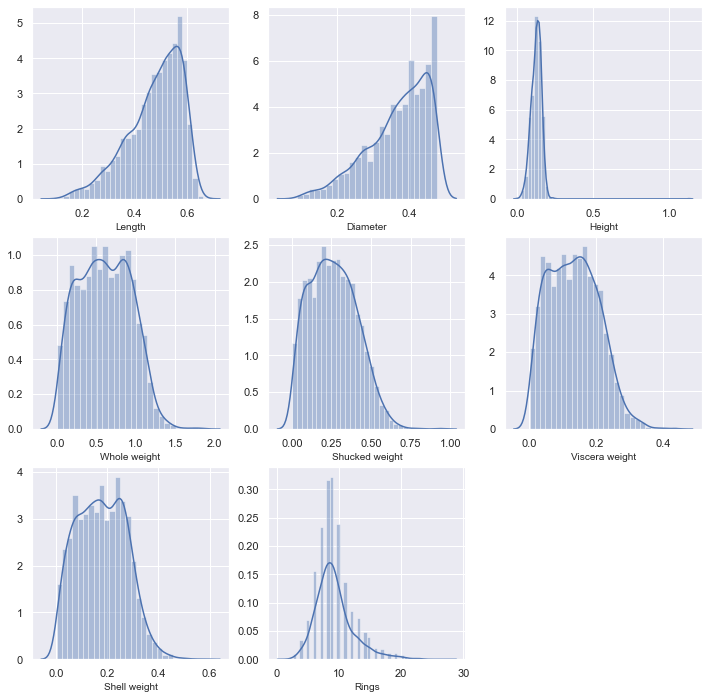

In [21]:
plt.figure(figsize=(12,12))
plotnumber=1
for i in df_numeric1:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df_numeric1[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

Checking corelation between depndenet and indepndenet features and among the indepndenet features.

In [22]:
corrrelation = df_abalone_new.corr()

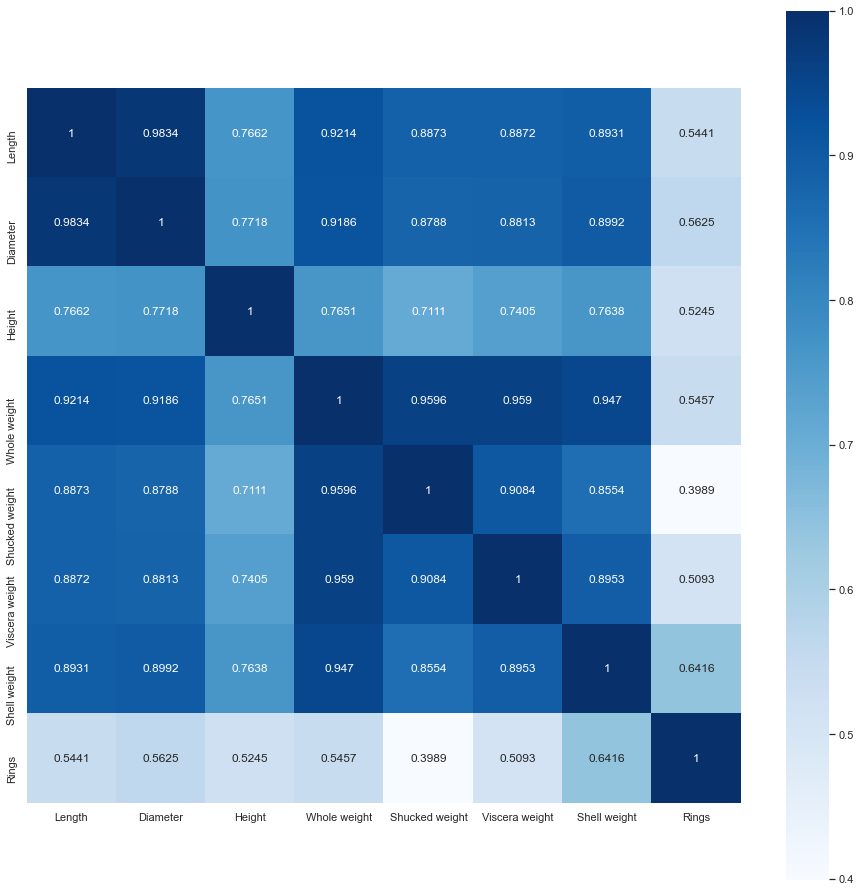

In [23]:
plt.figure(figsize=(16,16))
sns.heatmap(corrrelation,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

## Categorical Encoding

* Using pandas get_dummy function to convert into numetic

In [24]:
df_abalone_new = pd.get_dummies(df_abalone_new)

In [25]:
df_abalone_new.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


### Feature Engeneering !

In [26]:
# importing StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler 

# importing train test split
from sklearn.model_selection import train_test_split

In [27]:
# Dividing the features and label
X = df_abalone_new.drop(['Rings'],axis=1)
y = df_abalone_new['Rings']

In [28]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (3064, 10)
Shape of Y (3064,)


In [29]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.20, random_state=42)

## Model Building....!

* Importing libraries for model building......!

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [32]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
print("Model is created")

Model is created


In [33]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm=svm.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [34]:
print("lr_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))
print("svm_score",svm.score(X_train,y_train))

lr_score 0.5488593948574638
knn_score 0.6607014476875122
dt_score 1.0
rf_score 0.9345151874436152
adb_score 0.4522909377586506
svm_score 0.5556267227409262


### Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [36]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)

In [37]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))

lr_score 3.661395520306305
knn_score 4.411876019575857
dt_score 7.98694942903752
rf_score 3.762108972267537
adb_score 5.038855096765223
svm_score 3.742000996528749


### CrossValidation

In [38]:
from sklearn.model_selection import KFold,cross_val_score

In [39]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [40]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5))
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5))

Cross validation score for lr model => [0.45709539 0.42348174 0.42136446 0.55356918 0.53279427]
Cross validation score for knn model => [0.32213171 0.43940513 0.41094826 0.54527173 0.46215001]
Cross validation score for dt model => [ 0.12871946 -0.18033397 -0.02161727  0.20899732  0.10956059]
Cross validation score for rf model => [0.44138385 0.466591   0.43505102 0.57591389 0.51112036]
Cross validation score for adb model => [ 0.46995139 -0.17969531  0.26619848  0.29245373  0.26656307]
Cross validation score for svm model => [0.36138517 0.59576912 0.46224857 0.59784336 0.5659946 ]


In [41]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5).mean())

Cross validation score for lr model => 0.4776610080405397
Cross validation score for knn model => 0.4359813683126454
Cross validation score for dt model => 0.018625965539398527
Cross validation score for rf model => 0.48744392140222936
Cross validation score for adb model => 0.24842615271699184
Cross validation score for svm model => 0.5166481655506612


In the cross validation i found our decision tree model can be a good predictor for our regression problem.and In oder to increase the chances of accuracy we will check the hyperparameter tuning.

## HyperParameter Tuning !

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
dt.get_params().keys()  # to check the parameters

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [44]:
parm_grid = {'criterion':['mse', 'mae'],
             'splitter' : ['best','random'],
             'max_depth' : [2,5,6,8,10,20],
             'min_samples_split' : [5,7],
             'min_samples_leaf': [2, 3, 4, 5,6],
             'max_features' : ['auto','log2','sqrt'],
             'max_leaf_nodes' : [10,15,20]
             }
print('parm_grid',parm_grid)

parm_grid {'criterion': ['mse', 'mae'], 'splitter': ['best', 'random'], 'max_depth': [2, 5, 6, 8, 10, 20], 'min_samples_split': [5, 7], 'min_samples_leaf': [2, 3, 4, 5, 6], 'max_features': ['auto', 'log2', 'sqrt'], 'max_leaf_nodes': [10, 15, 20]}


In [45]:
gridsearch = GridSearchCV(estimator = dt , param_grid = parm_grid)

In [46]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 5, 6, 8, 10, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'max_leaf_nodes': [10, 15, 20],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 7],
                         'splitter': ['best', 'random']})

In [55]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [56]:
dt_gridsearch = DecisionTreeRegressor(criterion= 'mse',max_depth=20,min_samples_leaf=2,min_samples_split=5,splitter='best',
                                    max_features='auto',max_leaf_nodes=20)

In [57]:
dt_gridsearch.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=2, min_samples_split=5)

In [58]:
dt_gridsearch.score(X_train,y_train)

0.5633672146044353

In [60]:
dt.score(X_train,y_train)

1.0

We can see our decision tree model giving better accuracy without hyperparametr tuning same check with cross validation and we found best predictor for this problem.

### Model saving

In [61]:
import pickle

In [62]:
filename = 'abalone_model.pickle'

In [63]:
pickle.dump(dt,open(filename,'wb'))

### Thank You........!